In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
import pandas as pd

import string
from collections import Counter
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/tosun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tosun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tosun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tosun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
raw_dataset = pd.read_csv('data/reviews.csv')
reviews_dataset = raw_dataset[["category_id", "app_id", "content", "date"]]
#reviews_dataset.head(10)

In [4]:
def calculateAverage(dataset):
    reviews_dataset_date2 = dataset
    count_row = reviews_dataset_date2.shape[0]
    #reviews_dataset.head(100)
    #print(count_row)
    reviews_dataset_date2.head(100)
    

    # Cell 1
    #text = reviews_dataset_date2.iloc[0]["content"]

    review_list = reviews_dataset_date2["content"]
    cleaned_review_list = []

    for review in review_list:
        #review_lower_case = review.lower()
        review_cleaned_text = str(review).translate(str.maketrans('', '', string.punctuation))
        tokenized_words = word_tokenize(review_cleaned_text, "english")
        final_words = []
        for word in tokenized_words:
            if word not in stopwords.words('english'):
                final_words.append(word)

        final_sentence = ""    

        for word in final_words:
          final_sentence = final_sentence + word + " "

        cleaned_review_list.append(final_sentence)

    cleaned_review_dataframe = pd.DataFrame(cleaned_review_list, columns=['content'])
    #print(cleaned_review_dataframe.shape[0])
    #cleaned_review_dataframe.head(10)

    sia = SentimentIntensityAnalyzer()

    result_list = []

    for final_review in cleaned_review_list:
        result = sia.polarity_scores(final_review)
        result_list.append(result)

    len(result_list)  


    total = 0
    counter = 0
    for result in result_list:
         total += result['compound']
         counter = counter + 1 

    if(counter == 0):
        print("Warning....")
        return 0
    
    average = total / counter
    return average

    #positive: compound score>=0.05
    #neutral: compound score between -0.05 and 0.05
    #negative: compound score<=-0.05 
    ##print(result_list)   
    
    #Cell2

In [5]:
reviews_dataset_category = reviews_dataset[reviews_dataset["category_id"] == 1]
reviews_dataset_app = reviews_dataset_category[reviews_dataset_category["app_id"] == 1]
reviews_dataset_date = reviews_dataset_app[reviews_dataset_app["date"] >= "2019-01-00"]
reviews_dataset_date2 = reviews_dataset_date[reviews_dataset_date["date"] <= "2019-02-00"]

categories = []
apps = []
startDates = []
endDates = []

categories.append(1)
categories.append(2)
categories.append(3)
categories.append(4)
categories.append(5)

apps.append(1)
apps.append(2)
apps.append(3)

startDates.append("2019-01-00")
startDates.append("2019-02-00")
startDates.append("2019-03-00")
startDates.append("2019-04-00")
startDates.append("2019-05-00")
startDates.append("2019-06-00")
startDates.append("2019-07-00")
startDates.append("2019-08-00")
startDates.append("2019-09-00")
startDates.append("2019-10-00")
startDates.append("2019-11-00")
startDates.append("2019-12-00")
startDates.append("2020-01-00")
startDates.append("2020-02-00")
startDates.append("2020-03-00")
startDates.append("2020-04-00")
startDates.append("2020-05-00")
startDates.append("2020-06-00")
startDates.append("2020-07-00")
startDates.append("2020-08-00")
startDates.append("2020-09-00")
startDates.append("2020-10-00")
startDates.append("2020-11-00")
startDates.append("2020-12-00")

endDates.append("2019-02-00")
endDates.append("2019-03-00")
endDates.append("2019-04-00")
endDates.append("2019-05-00")
endDates.append("2019-06-00")
endDates.append("2019-07-00")
endDates.append("2019-08-00")
endDates.append("2019-09-00")
endDates.append("2019-10-00")
endDates.append("2019-11-00")
endDates.append("2019-12-00")
endDates.append("2020-01-00")
endDates.append("2020-02-00")
endDates.append("2020-03-00")
endDates.append("2020-04-00")
endDates.append("2020-05-00")
endDates.append("2020-06-00")
endDates.append("2020-07-00")
endDates.append("2020-08-00")
endDates.append("2020-09-00")
endDates.append("2020-10-00")
endDates.append("2020-11-00")
endDates.append("2020-12-00")
endDates.append("2021-01-00")

result_array = np.zeros((5,3,24))

for category in categories:
    for app in apps:
        for i in range(24): 
            reviews_dataset_category = reviews_dataset[reviews_dataset["category_id"] == category]
            reviews_dataset_app = reviews_dataset_category[reviews_dataset_category["app_id"] == app]           
            reviews_dataset_date = reviews_dataset_app[reviews_dataset_app["date"] >= startDates[i]]
            reviews_dataset_date2 = reviews_dataset_date[reviews_dataset_date["date"] <= endDates[i]]
            result_array[category-1][app-1][i] = calculateAverage(reviews_dataset_date2)
            print("Cat " + str(category-1) + "App " + str(app-1) + "i " + str(i))
            print(result_array[category-1][app-1][i])
           # print("Category Number = " + str(category) + " App number" + str(app) + " " + str(startDates[i]) + " and " + str(endDates[i]) + " Result: " + str())

        

#app1_array = result_array[0][0][:12]            
#print(app1_array)
        


Cat 0App 0i 0
0.39169200000000015
Cat 0App 0i 1
0.3809080000000001
Cat 0App 0i 2
0.3978789999999999
Cat 0App 0i 3
0.42277699999999996
Cat 0App 0i 4
0.40056600000000003
Cat 0App 0i 5
0.40055102040816315
Cat 0App 0i 6
0.4236699999999998
Cat 0App 0i 7
0.48193899999999984
Cat 0App 0i 8
0.37383099999999997
Cat 0App 0i 9
0.25127878787878793
Cat 0App 0i 10
0.19667499999999996
Cat 0App 0i 11
0.3908252525252524
Cat 0App 0i 12
0.29281599999999997
Cat 0App 0i 13
0.31959399999999993
Cat 0App 0i 14
0.4424509999999997
Cat 0App 0i 15
0.305917
Cat 0App 0i 16
0.419694
Cat 0App 0i 17
0.524418
Cat 0App 0i 18
0.44532999999999995
Cat 0App 0i 19
0.37942222222222205
Cat 0App 0i 20
0.43169795918367343
Cat 0App 0i 21
0.4221099999999998
Cat 0App 0i 22
0.3552878787878788
Cat 0App 0i 23
0.5038659999999999
Cat 0App 1i 0
0.3397414141414143
Cat 0App 1i 1
0.293837
Cat 0App 1i 2
0.33620599999999995
Cat 0App 1i 3
0.348565
Cat 0App 1i 4
0.27686262626262625
Cat 0App 1i 5
0.25813900000000006
Cat 0App 1i 6
0.24019300000000

Cat 3App 1i 13
0.4051849999999999
Cat 3App 1i 14
0.4498169999999999
Cat 3App 1i 15
0.42861699999999986
Cat 3App 1i 16
0.4233789999999999
Cat 3App 1i 17
0.46254399999999996
Cat 3App 1i 18
0.37900499999999987
Cat 3App 1i 19
0.4488719999999999
Cat 3App 1i 20
0.447791919191919
Cat 3App 1i 21
0.4084999999999999
Cat 3App 1i 22
0.3741091836734694
Cat 3App 1i 23
0.31357692307692314
Cat 3App 2i 0
0.3876159999999998
Cat 3App 2i 1
0.4181499999999997
Cat 3App 2i 2
0.296181
Cat 3App 2i 3
0.33202000000000015
Cat 3App 2i 4
0.3698660000000001
Cat 3App 2i 5
0.27811099999999994
Cat 3App 2i 6
0.328642
Cat 3App 2i 7
0.28465300000000004
Cat 3App 2i 8
0.3000389999999999
Cat 3App 2i 9
0.2655830000000001
Cat 3App 2i 10
0.35193099999999994
Cat 3App 2i 11
0.3284122448979592
Cat 3App 2i 12
0.3802474747474746
Cat 3App 2i 13
0.30053500000000005
Cat 3App 2i 14
0.42044444444444434
Cat 3App 2i 15
0.35234699999999997
Cat 3App 2i 16
0.35367900000000013
Cat 3App 2i 17
0.3942626262626262
Cat 3App 2i 18
0.3417330000000000

[0.391692   0.380908   0.397879   0.422777   0.400566   0.40055102
 0.42367    0.481939   0.373831   0.25127879 0.196675   0.39082525
 0.292816   0.319594   0.442451   0.305917   0.419694   0.524418
 0.44533    0.37942222 0.43169796 0.42211    0.35528788 0.503866  ]
[0.391692   0.380908   0.397879   0.422777   0.400566   0.40055102
 0.42367    0.481939   0.373831   0.25127879 0.196675   0.39082525]
[0.292816   0.319594   0.442451   0.305917   0.419694   0.524418
 0.44533    0.37942222 0.43169796 0.42211    0.35528788 0.503866  ]
[['Uber Eats', 'Wish', 'Google Maps'], ['Uber Eats', 'Wish', 'Google Maps'], ['Uber Eats', 'Wish', 'Google Maps'], ['Uber Eats', 'Wish', 'Google Maps'], ['Uber Eats', 'Wish', 'Google Maps']]


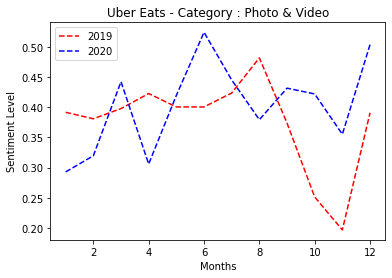

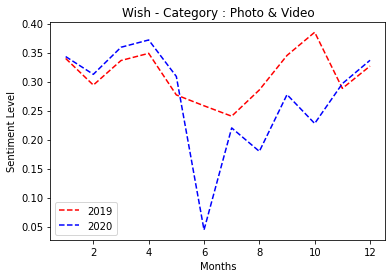

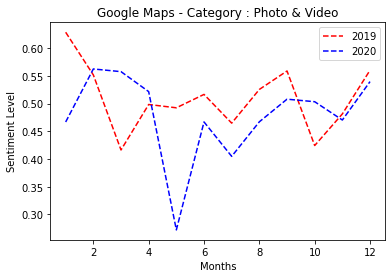

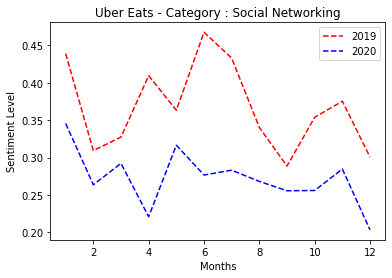

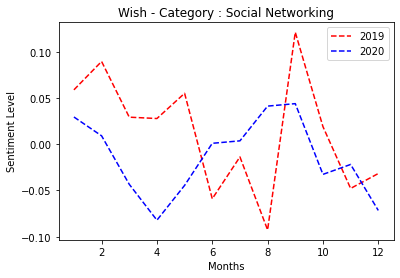

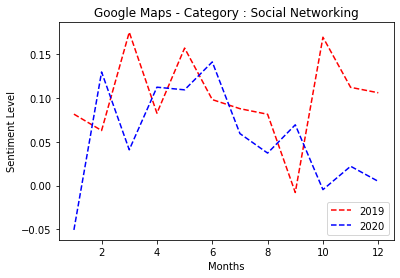

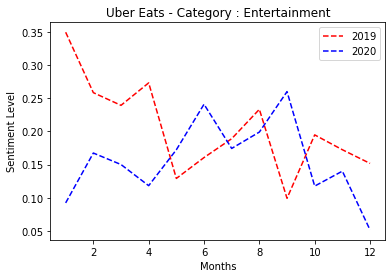

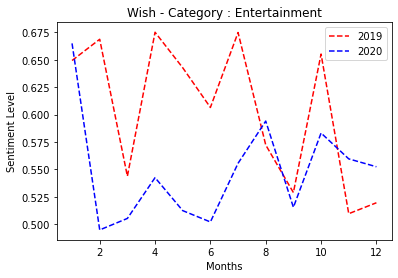

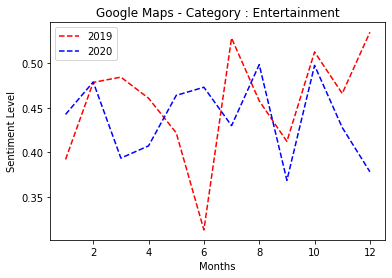

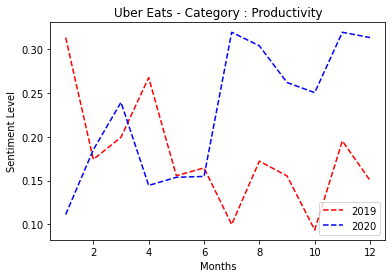

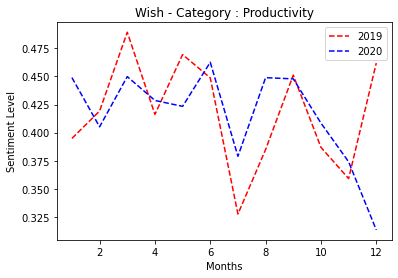

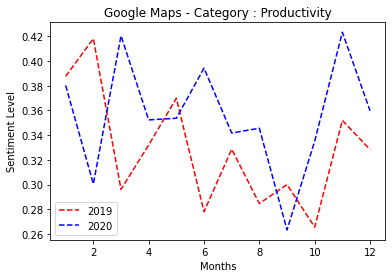

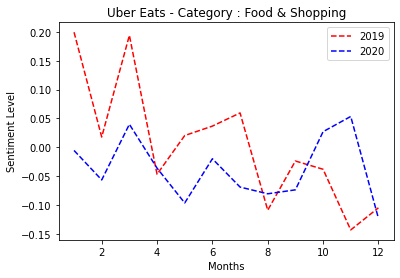

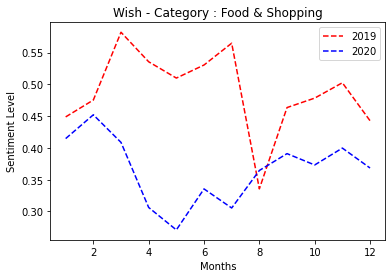

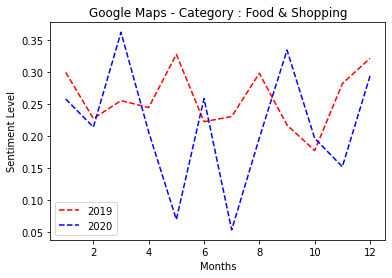

[0.4533618047138048, 0.40879266666666675, 0.3834373333333332, 0.4232023333333333, 0.38991420875420874, 0.3917190068027209, 0.3761671279461279, 0.4309582087542087, 0.42585398653198636, 0.3534862626262625, 0.32203366666666655, 0.4258514175084174, 0.3675009764309764, 0.39811892592592574, 0.4530199999999998, 0.399675047138047, 0.33344296632996634, 0.34510431649831635, 0.3566628299319728, 0.34200274074074066, 0.4056545183810898, 0.38433866666666655, 0.3739671245791245, 0.4600214285714284]
[0.1931167306397307, 0.1538895930735931, 0.17729566666666663, 0.1733293333333333, 0.19177509427609427, 0.16891744444444434, 0.1690026936026936, 0.1096674965986395, 0.13393887205387203, 0.18081666666666663, 0.146566, 0.12497973063973063, 0.10810702020202022, 0.13415333333333332, 0.0965720909090909, 0.08373433333333334, 0.127113, 0.13964008754208757, 0.11539448148148146, 0.11548700000000005, 0.12297797306397312, 0.07291510101010103, 0.09496215151515149, 0.045497]
[0.463559441077441, 0.468447, 0.4224498911564

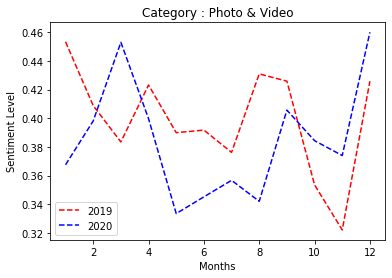

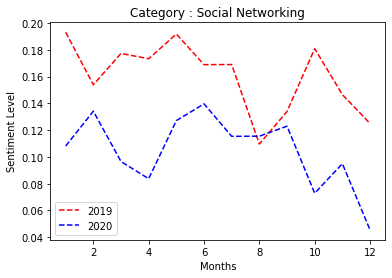

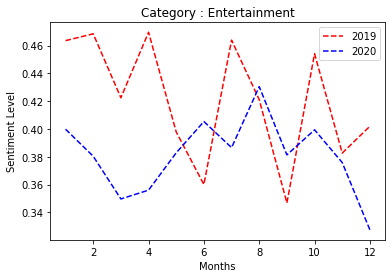

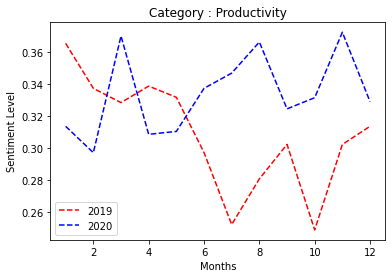

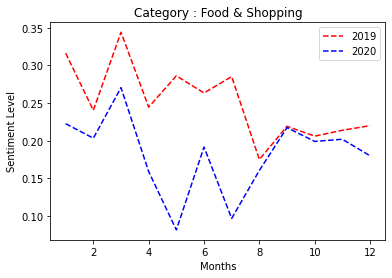

In [6]:
app1_array = result_array[0][0] 
app1_array2 = result_array[0][0][:12] 
app1_array3 = result_array[0][0][12:] 
print(app1_array)
print(app1_array2)
print(app1_array3)

rows, cols = (5, 3) 
name_array = [[0]*cols]*rows 

name_array[0][0] = "Pinterest"
name_array[0][1] = "Youtube"
name_array[0][2] = "TikTok"
name_array[1][0] = "Whatsapp"
name_array[1][1] = "Facebook"
name_array[1][2] = "Messenger"
name_array[2][0] = "Hulu"
name_array[2][1] = "Roblox"
name_array[2][2] = "Spotify"
name_array[3][0] = "Outlook"
name_array[3][1] = "Google Docs"
name_array[3][2] = "Google Drive"
name_array[4][0] = "Uber Eats"
name_array[4][1] = "Wish"
name_array[4][2] = "Google Maps"

print(name_array) 


category_array = [0]*5 

category_array[0] = "Photo & Video"
category_array[1] = "Social Networking"
category_array[2] = "Entertainment"
category_array[3] = "Productivity"
category_array[4] = "Food & Shopping"

x_axis = np.linspace(1, 12, 12)

for i in range(5):
    for j in range(3):
        plt.plot(x_axis, result_array[i][j][:12] ,'r--', label="2019")
        plt.plot(x_axis, result_array[i][j][12:] ,'b--', label="2020")
        plt.title(str(name_array[i][j]) + " - Category : " + str(category_array[i]))
        plt.xlabel("Months")
        plt.ylabel("Sentiment Level")   
        plt.legend()
        plt.show()


category_array1 = result_array[0]
category_array2 = result_array[1]
category_array3 = result_array[2]
category_array4 = result_array[3]
category_array5 = result_array[4]

category_result1 = [0]*24 
category_result2 = [0]*24 
category_result3 = [0]*24 
category_result4 = [0]*24 
category_result5 = [0]*24 

for i in range(24):
    total = 0
    for j in range(3):
        total = total + category_array1[j][i]
    average = total/3
    category_result1[i] = average
        

for i in range(24):
    total = 0
    for j in range(3):
        total = total + category_array2[j][i]
    average = total/3
    category_result2[i] = average
    

for i in range(24):
    total = 0
    for j in range(3):
        total = total + category_array3[j][i]
    average = total/3
    category_result3[i] = average
      

for i in range(24):
    total = 0
    for j in range(3):
        total = total + category_array4[j][i]
    average = total/3
    category_result4[i] = average
      

for i in range(24):
    total = 0
    for j in range(3):
        total = total + category_array5[j][i]
    average = total/3
    category_result5[i] = average
    

plt.plot(x_axis, category_result1[:12] ,'r--', label="2019")
plt.plot(x_axis, category_result1[12:] ,'b--', label="2020")
plt.title("Category : " + str(category_array[0]))
plt.xlabel("Months")
plt.ylabel("Sentiment Level")   
plt.legend()
plt.show()

plt.plot(x_axis, category_result2[:12] ,'r--', label="2019")
plt.plot(x_axis, category_result2[12:] ,'b--', label="2020")
plt.title("Category : " + str(category_array[1]))
plt.xlabel("Months")
plt.ylabel("Sentiment Level")   
plt.legend()
plt.show()

plt.plot(x_axis, category_result3[:12] ,'r--', label="2019")
plt.plot(x_axis, category_result3[12:] ,'b--', label="2020")
plt.title("Category : " + str(category_array[2]))
plt.xlabel("Months")
plt.ylabel("Sentiment Level")   
plt.legend()
plt.show()

plt.plot(x_axis, category_result4[:12] ,'r--', label="2019")
plt.plot(x_axis, category_result4[12:] ,'b--', label="2020")
plt.title("Category : " + str(category_array[3]))
plt.xlabel("Months")
plt.ylabel("Sentiment Level")   
plt.legend()
plt.show()

plt.plot(x_axis, category_result5[:12] ,'r--', label="2019")
plt.plot(x_axis, category_result5[12:] ,'b--', label="2020")
plt.title("Category : " + str(category_array[4]))
plt.xlabel("Months")
plt.ylabel("Sentiment Level")   
plt.legend()
plt.show()
        
    